# Model Training
## Importing required libraries

In [1]:
import plotly as px
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

## Getting latest datetime

In [2]:
end = datetime.now()
start = datetime(end.year-20,  end.month, end.month)

## Getting a dataset to train
 We use google stocks data to train our model. We get stocks data from Yahoo finance

In [3]:
stock="GOOG"
google_data=yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
google_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2004-12-13,4.234937,4.245337,4.313333,4.220431,4.288177,193466452
2004-12-14,4.439665,4.450568,4.453806,4.224167,4.259036,445198482
2004-12-15,4.466746,4.477716,4.500381,4.400008,4.433134,460559845
2004-12-16,4.384508,4.395275,4.495400,4.382324,4.407231,344197318
2004-12-17,4.474200,4.485188,4.495649,4.397268,4.402498,296555412


## Plotting graphs for adjacent close price

Text(0.5, 1.0, 'Closing price of google data')

<Figure size 2500x2000 with 0 Axes>

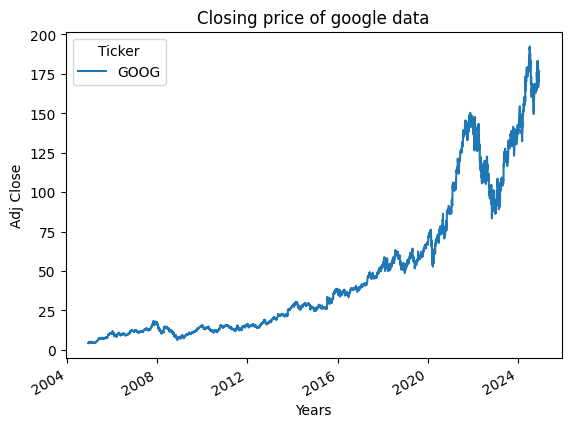

In [5]:
plt.figure(figsize=(25,20))
google_data["Adj Close"].plot()
plt.ylabel("Adj Close")
plt.xlabel("Years")
plt.title("Closing price of google data")

In [6]:
for i in range(2004,2025):
    print(i, list(google_data.index.year).count(i))

2004 14
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 236


In [7]:
google_data["MA for 250 days"]=google_data["Adj Close"].rolling(250).mean()

In [8]:
google_data["MA for 250 days"][0:250].tail()

Date
2005-12-01         NaN
2005-12-02         NaN
2005-12-05         NaN
2005-12-06         NaN
2005-12-07    6.543354
Name: MA for 250 days, dtype: float64

## Defining a plot graph function for easier graph plotting

In [9]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

## Making comparisons of moving averages over various periods with actual close price

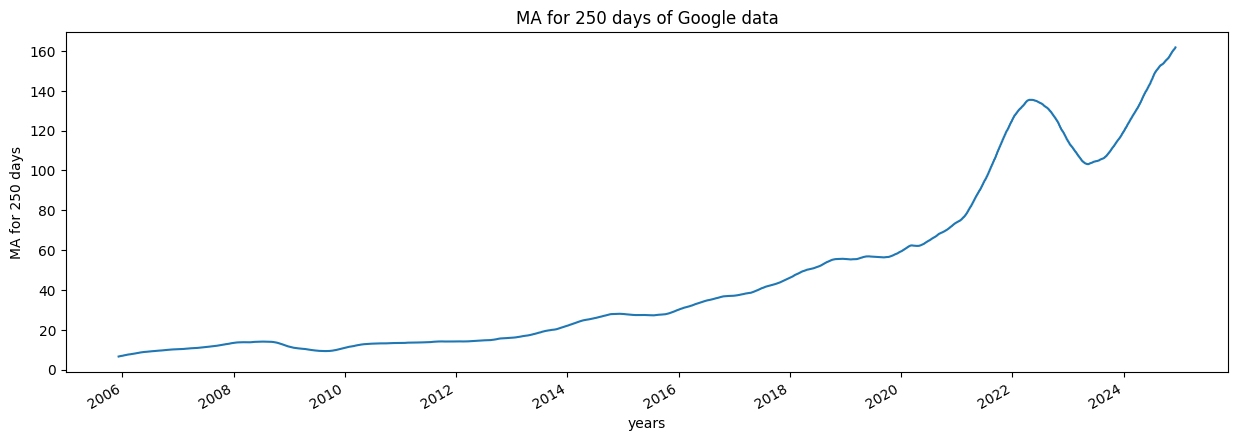

In [10]:
plot_graph((15,5), google_data["MA for 250 days"], "MA for 250 days")

<Figure size 640x480 with 0 Axes>

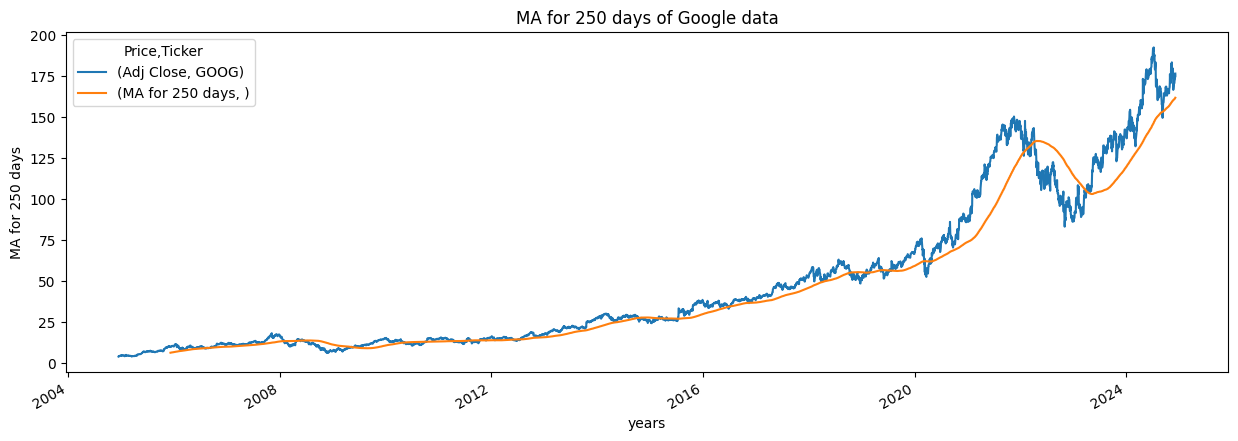

In [11]:
plot_graph((15,5), google_data[["Adj Close", "MA for 250 days"]], "MA for 250 days")

<Figure size 640x480 with 0 Axes>

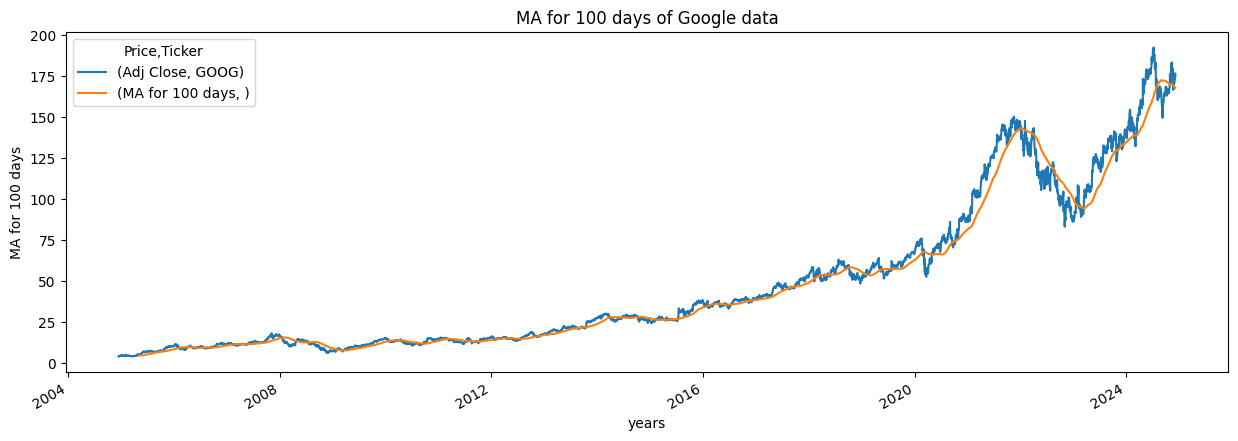

In [12]:
google_data["MA for 100 days"]=google_data["Adj Close"].rolling(100).mean()
plot_graph((15,5), google_data[["Adj Close", "MA for 100 days"]], "MA for 100 days")

<Figure size 640x480 with 0 Axes>

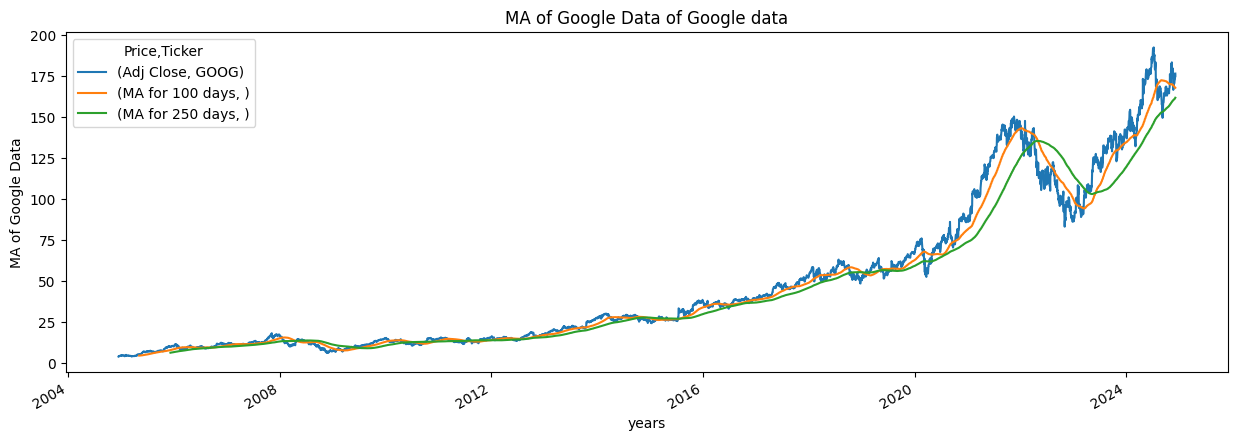

In [13]:
plot_graph((15,5), google_data[["Adj Close", "MA for 100 days",  "MA for 250 days"]], "MA of Google Data")

In [14]:
google_data["percentage_change_cp"]=google_data["Adj Close"].pct_change()
google_data[["Adj Close", "percentage_change_cp"]].head()

Price,Adj Close,percentage_change_cp
Ticker,GOOG,
Date,,
2004-12-13,4.234937,NaN
2004-12-14,4.439665,0.048343
2004-12-15,4.466746,0.006100
2004-12-16,4.384508,-0.018411
2004-12-17,4.474200,0.020457


## Looking at percentage change of google stock data over the years

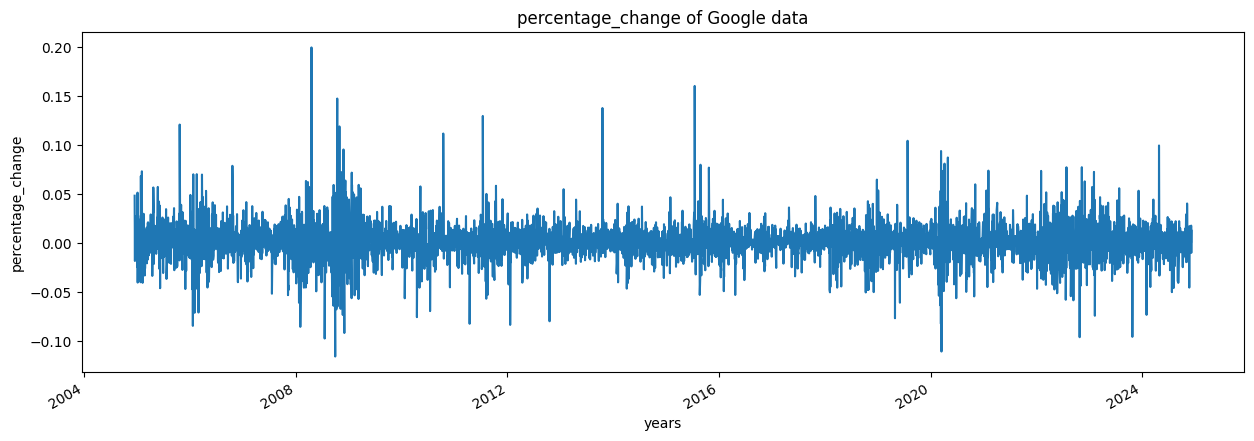

In [15]:
plot_graph((15,5), google_data["percentage_change_cp"], "percentage_change")

In [16]:
adj_close_price=google_data[["Adj Close"]]

## Scaling the data so that the model has an easier time understanding

In [17]:
scaler=MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(adj_close_price)
scaled_data

array([[0.        ],
       [0.00108799],
       [0.0012319 ],
       ...,
       [0.91328813],
       [0.9038287 ],
       [0.9154139 ]])

In [18]:
len(scaled_data)

5031

## Splitting datas

In [19]:
x_data=[]
y_data=[]

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

x_data,y_data=np.array(x_data),np.array(y_data)

## Splitting into training and testing datasets

In [20]:
split_len=int(len(x_data)*0.7)

x_train=x_data[:split_len]
y_train=y_data[:split_len]

x_test=x_data[split_len:]
y_test=y_data[split_len:]

In [21]:
print("x train:", x_train.shape)
print("y train:", y_train.shape)

print("x test:", x_test.shape)
print("y test:", y_test.shape)

x train: (3451, 100, 1)
y train: (3451, 1)
x test: (1480, 100, 1)
y test: (1480, 1)


## Using Long Short Term Memory(LSTM) for analysis

In [22]:
model=Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)) )
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\Welcome\Desktop\Projects\MLProjects\jupyter-env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer="Adam", loss="mean_squared_error")

In [24]:
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 80s 23ms/step - loss: 2.5860e-04
Epoch 2/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 80s 23ms/step - loss: 7.8412e-05


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [26]:
prediction=model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [27]:
prediction

array([[0.24617207],
       [0.24551453],
       [0.24509312],
       ...,
       [0.7243026 ],
       [0.728796  ],
       [0.7292073 ]], dtype=float32)

In [28]:
actual_prediction=scaler.inverse_transform(prediction)
actual_prediction

array([[ 50.557575],
       [ 50.43384 ],
       [ 50.354546],
       ...,
       [140.52824 ],
       [141.37378 ],
       [141.45117 ]], dtype=float32)

In [29]:
actual_expected=scaler.inverse_transform(y_test)
actual_expected

array([[ 53.64675522],
       [ 53.56345749],
       [ 54.41586304],
       ...,
       [176.08999634],
       [174.30999756],
       [176.49000549]])

In [30]:
rmse=np.sqrt(np.mean( (actual_prediction-actual_expected)**2))

## Getting the Root Mean Squared Error(RMSE) to see error margin of our model

In [31]:
rmse

np.float64(16.861510115466174)

In [32]:
plot_data=pd.DataFrame(
    {
        'Original Test Data':actual_expected.reshape(-1),
        'Predicted Values':actual_prediction.reshape(-1),
    },
    index=google_data.index[split_len+100:]
)

plot_data.head()

,Original Test Data,Predicted Values
Date,,
2019-01-23,53.646755,50.557575
2019-01-24,53.563457,50.433842
2019-01-25,54.415863,50.354546
2019-01-28,53.372925,50.556786
2019-01-29,52.901081,50.469284


## Comparison of predicted vs original values

<Figure size 640x480 with 0 Axes>

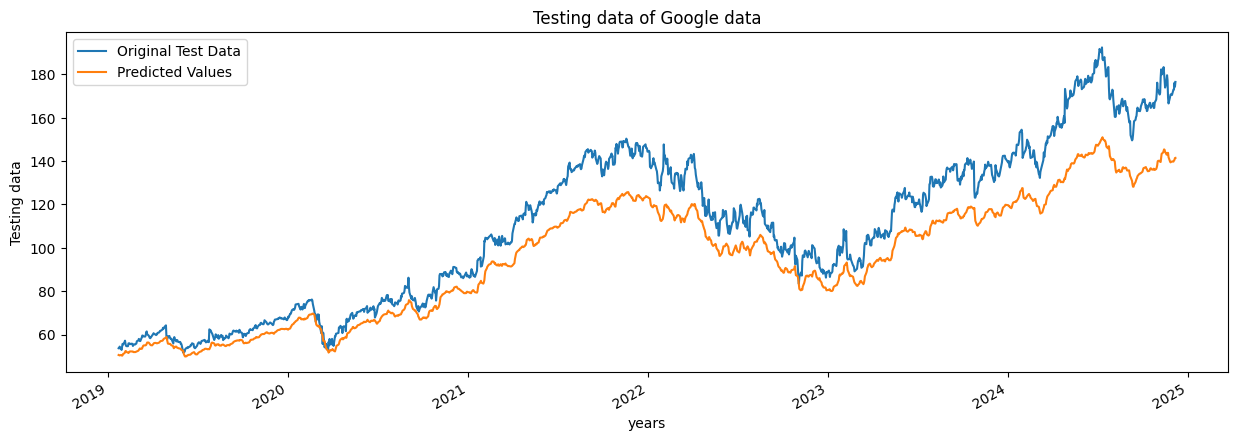

In [33]:
plot_graph((15,5), plot_data, 'Testing data')

## Using test data to train and then checking the accuracy.

Here,
the blue line is training data

orange line is the original values

green line is the predicted data

<Figure size 640x480 with 0 Axes>

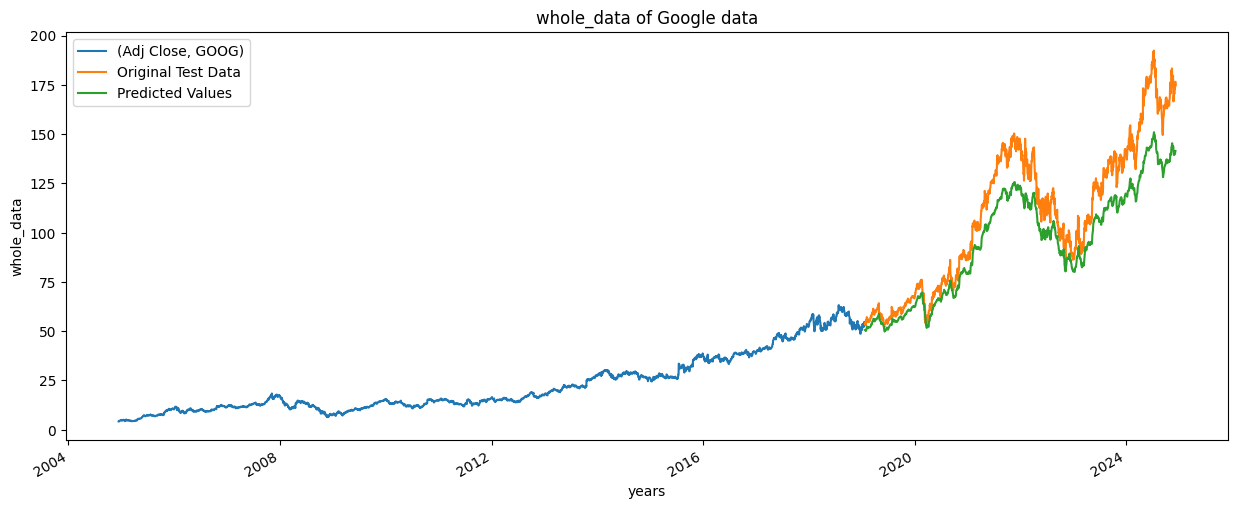

In [34]:
plot_graph((15,6), pd.concat([adj_close_price[:split_len+100], plot_data], axis=0), 'whole_data')

## Saving the model

In [35]:
model.save("stock_prediction_model.keras")